In [53]:
import tensorflow as tf
from tensorflow import keras

# Define the directory paths
train_dir = 'c:\\Users\\ahmed\\Documents\\Downloads\\Teeth_Dataset\\Training'
test_dir = 'C:\\Users\\ahmed\\Documents\\Downloads\\Teeth_Dataset\\Testing'
val_dir = 'C:\\Users\\ahmed\\Documents\\Downloads\\Teeth_Dataset\\Validation'


img_height = 255  
img_width = 255   


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),  
    batch_size=32 
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=(img_height, img_width),
    batch_size=32  
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=32  
)

class_names = train_ds.class_names  
print("Classes:", class_names)

Found 3088 files belonging to 7 classes.
Found 1028 files belonging to 7 classes.
Found 1508 files belonging to 10 classes.
Classes: ['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']


In [54]:
def preprocess(image, label):
    norm_image = tf.cast(image, tf.float32) / 255.0
    return norm_image, label

In [55]:
def train_data_prep(data, shuffle_size):
    data = data.map(preprocess)
    data = data.cache()
    data = data.shuffle(shuffle_size)
    data = data.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return data


def test_data_prep(data):
    data = data.map(preprocess)
    data = data.cache()
    data = data.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return data

In [56]:
train_ds = train_data_prep(train_ds, shuffle_size=1000)
val_ds = test_data_prep(val_ds)
test_ds = test_data_prep(test_ds)

In [57]:
input_shape1 = (img_height, img_width, 3)  


teeth_model =  tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape1),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(0.5),  
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(0.5),  
    
    tf.keras.layers.Dense(units=7, activation='softmax')   
])  


teeth_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 253, 253, 32)      896       
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 126, 126, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_37 (Conv2D)          (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_38 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 30, 30, 128)     

In [58]:
teeth_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",  
    metrics=["accuracy"]
)

In [59]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = teeth_model.fit(
    train_ds,  
    validation_data=val_ds,  
    epochs=8,  
    callbacks=[early_stopping]
)


print("History:", history.history)

Epoch 1/8
97/97 [==============================] - 390s 4s/step - loss: 2.0838 - accuracy: 0.1713 - val_loss: 1.9244 - val_accuracy: 0.1916
Epoch 2/8
97/97 [==============================] - 327s 3s/step - loss: 1.8820 - accuracy: 0.2150 - val_loss: 1.7774 - val_accuracy: 0.3132
Epoch 3/8
97/97 [==============================] - 229s 2s/step - loss: 1.7700 - accuracy: 0.3073 - val_loss: 1.7239 - val_accuracy: 0.3113
Epoch 4/8
97/97 [==============================] - 228s 2s/step - loss: 1.5438 - accuracy: 0.4071 - val_loss: 1.5416 - val_accuracy: 0.4125
Epoch 5/8
97/97 [==============================] - 227s 2s/step - loss: 1.2367 - accuracy: 0.5424 - val_loss: 1.4832 - val_accuracy: 0.4436
Epoch 6/8
97/97 [==============================] - 227s 2s/step - loss: 0.8268 - accuracy: 0.7043 - val_loss: 1.6351 - val_accuracy: 0.4484
Epoch 7/8
97/97 [==============================] - 226s 2s/step - loss: 0.5432 - accuracy: 0.8238 - val_loss: 1.6173 - val_accuracy: 0.4932
Epoch 8/8
97/97 [===

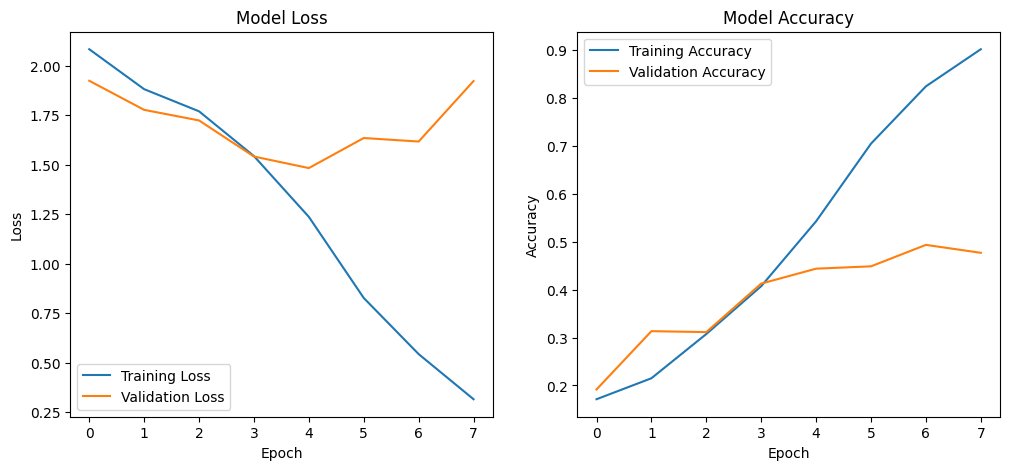

In [60]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [70]:

test_images, test_labels = next(iter(test_ds))
predictions = teeth_model.predict(test_images)  
predicted_labels = np.argmax(predictions, axis=1)  

# Calculate accuracy
accuracy = np.mean(predicted_labels == test_labels.numpy())
print(f"Test Accuracy: {accuracy:.4f}")

1/1 [==============================] - 0s 474ms/step
Test Accuracy: 0.4062
